<a href="https://colab.research.google.com/github/Thehussain17/Fisab/blob/main/Sentiment_analysis_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 117.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.0
    Uninstalling transformers-4.57.0:
      Successfully uninstalled transformers-4.57.0


In order to do this, we are going to use the ProsusAi model Finbert, which we would further fine-tune, by training it on the dataset of labelled financial news articles called financial_phrasebank


We start by loading the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Sentences_AllAgree.txt", sep='@', names=['sentence', 'label'], encoding='latin-1')
print("Dataframe head:")
print(df.head())

Dataframe head:
                                            sentence     label
0  According to Gran , the company has no plans t...   neutral
1  For the last quarter of 2010 , Componenta 's n...  positive
2  In the third quarter of 2010 , net sales incre...  positive
3  Operating profit rose to EUR 13.1 mn from EUR ...  positive
4  Operating profit totalled EUR 21.1 mn , up fro...  positive


['neutral', 'neutral', 'negative', 'positive', 'neutral']


Converting the dataframe to an hf dataset

In [3]:
from datasets import Dataset

# Convert the pandas DataFrame into a Hugging Face Dataset object
raw_dataset = Dataset.from_pandas(df)

# --- Verification ---
# Check the new Dataset object
print("\nHugging Face Dataset:")
print(raw_dataset)

# Look at the first example
print("\nFirst Example:")
print(raw_dataset[0])


Hugging Face Dataset:
Dataset({
    features: ['sentence', 'label'],
    num_rows: 2264
})

First Example:
{'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'label': 'neutral'}


In [5]:
split_dataset = raw_dataset.train_test_split(test_size=0.2, seed=42, shuffle=True)
print("\nSplit Dataset:")
print(split_dataset)


Split Dataset:
DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 1811
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 453
    })
})


In [16]:
# Create a dictionary to map string labels to integers
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}

# Create a function to apply this mapping
def map_labels(example):
    example['label'] = label_map[example['label']]
    return example

# Apply this function to your entire dataset
final_dataset = split_dataset.map(map_labels)


# --- VERIFICATION ---
# Check the first 5 labels again. They should now be integers.
print("\nNew labels:")
print(final_dataset["train"]["label"][:5])

Map:   0%|          | 0/1811 [00:00<?, ? examples/s]

Map:   0%|          | 0/453 [00:00<?, ? examples/s]


New labels:
[1, 1, 0, 2, 1]


Loading the model ProsusAi/Finbert to train on this data

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Define the model name
model_name = "ProsusAI/finbert"

# Load the specialized tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the model with 3 labels (negative, neutral, positive)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

Tokenizing the data

In [29]:
def tokenize_function(examples):
    # This will pad shorter sentences and truncate longer ones to a uniform length.
    return tokenizer(examples["sentence"], padding="max_length", truncation=True)

In [30]:
tokenized_datasets=final_dataset.map(tokenize_function, batched=True)

print(tokenized_datasets['train'][0])

Map:   0%|          | 0/1811 [00:00<?, ? examples/s]

Map:   0%|          | 0/453 [00:00<?, ? examples/s]

{'sentence': "Koff 's market share of the volume of the market was 23.4 % , Karhu 's 21.4 % .", 'label': 1, 'input_ids': [101, 12849, 4246, 1005, 1055, 3006, 3745, 1997, 1996, 3872, 1997, 1996, 3006, 2001, 2603, 1012, 1018, 1003, 1010, 10556, 25032, 2226, 1005, 1055, 2538, 1012, 1018, 1003, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Now we do the most awaited part of the entire process, actually fine-tune the model

In [25]:
from transformers import TrainingArguments

# Saving the model
output_dir = "finbert-financial-sentiment"

training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=2e-5,  # A standard learning rate for fine-tuning.
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,  # 2-3 epochs is usually enough for fine-tuning.
    weight_decay=0.01,  # A common regularization parameter.
    eval_strategy="epoch",  # Run evaluation at the end of each epoch.
    save_strategy="epoch",  # Save a model checkpoint at the end of each epoch.
    load_best_model_at_end=True, # Load the best model found during training.
    report_to="wandb"
)

In [31]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"], # The tokenized training data
    eval_dataset=tokenized_datasets["test"],   # The tokenized testing data
    tokenizer=tokenizer,

)

# Launch the fine-tuning process!
trainer.train()

/tmp/ipython-input-3554256649.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,No log,0.159165
2,No log,0.116224


TrainOutput(global_step=228, training_loss=0.31091562906901044, metrics={'train_runtime': 369.2935, 'train_samples_per_second': 9.808, 'train_steps_per_second': 0.617, 'total_flos': 952996799010816.0, 'train_loss': 0.31091562906901044, 'epoch': 2.0})

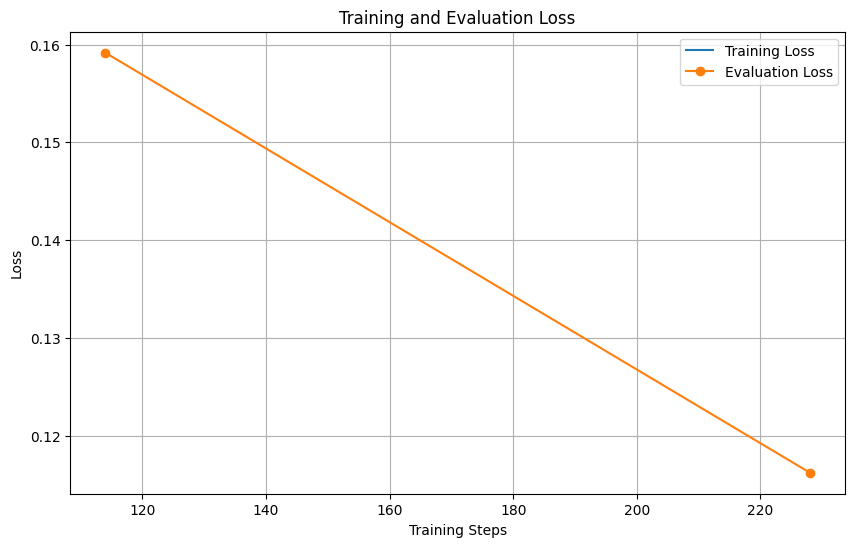

In [32]:
import matplotlib.pyplot as plt

# --- Extract the Log History ---
# The trainer.state.log_history contains a list of dictionaries with all the metrics.
log_history = trainer.state.log_history

# --- Separate Training and Evaluation Loss ---
train_loss = [item['loss'] for item in log_history if 'loss' in item]
eval_loss = [item['eval_loss'] for item in log_history if 'eval_loss' in item]

# The steps at which these losses were recorded
train_steps = [item['step'] for item in log_history if 'loss' in item]
eval_steps = [item['step'] for item in log_history if 'eval_loss' in item]


# --- Create the Plot ---
plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_loss, label='Training Loss')
plt.plot(eval_steps, eval_loss, label='Evaluation Loss', marker='o')

plt.title('Training and Evaluation Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# This will give you the aggregate performance metrics on the test data.
trainer.evaluate()

{'eval_loss': 0.1162242740392685,
 'eval_runtime': 12.6608,
 'eval_samples_per_second': 35.78,
 'eval_steps_per_second': 2.291,
 'epoch': 2.0}

In [34]:
!git clone https://YOUR_GITHUB_TOKEN@github.com/YOUR_GITHUB_USERNAME/YOUR_REPO_NAME.git



fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
